# Investigating a Data Set
## Introduction
In this investigation, I will be investigating the relationship between economic performance and women's empowerment.

### The Focus of the Study:
1. What correlation, if any, exists between economic development and women's empowerment?
2. How strong is this correlation? 
3. What other conclusions can we draw from exploring this data?

### Scources

I will be using GapMinder's GDP per Capita data to measure economic development.

I will also be using GapMinder's data as proxies for three attributes of women's empowerment:
1. Women's Indepenance: Age of first marriage for women
2. Women's Education: Mean years in school for women of Reproductive Age (15-44)
4. Violence Against Women: Murdered women (per 100,000)

Note: I am making one potentially contentious assumption in using age of first marriage as an indicator of female independance. However, with many societies practicing teen marriage or arranged marriage, I thought this would be a good rough indicator of women having the power to hold off until they feel ready for a commitment such of marriage.

In [30]:
# import libraries and load the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
print('Imports completed successfully.')
first_marriage_df = pd.read_csv('first_marriage_age.csv')
schoolyrs_df = pd.read_csv('school_years_girls.csv')
murdered_females_df = pd.read_csv('murdered_females_data.csv')
gdp_pc_df = pd.read_csv('GDP_percapita.csv')
fdi_gdp_df = pd.read_csv('FDI_percent_GDP.csv')
gdp_growth_df = pd.read_csv('gdppc_growth.csv')
pd.options.mode.chained_assignment = None 
print('Data loaded successfully.')

Imports completed successfully.
Data loaded successfully.


## Viewing and Cleaning the Data:
We are working with a number of data sets. 
In the coming steps, I will simplify, clean up, and consolidate the data sets so that we can begin our analysis.

### Age of First Marriage

In [5]:
# look at the first_marriage_df
first_marriage_df.head(3)

,Unnamed: 0,1616,1666,1685,1710,1716,1735,1760,1766,1775,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.839683
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.326509
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,29.600000


In [6]:
# here we can see that the 2005 data is our best bet for taking a snapshot of information, so let's focus on that
first_marriage_df.columns = first_marriage_df.columns.astype(str)
first_marriage_df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
first_marriage_df2 = first_marriage_df[['Country','2005']]
first_marriage_df2.rename(columns={'2005': 'age_first_marriage'}, inplace=True)
first_marriage_df2.head(3)

,Country,age_first_marriage
0,Afghanistan,17.839683
1,Albania,23.326509
2,Algeria,29.600000


### Years Spent in School for Women of Reproductive Age (Age>15)

In [7]:
schoolyrs_df.head(3)

,Row Labels,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
1,Albania,5.6,5.7,5.9,6.0,6.2,6.3,6.5,6.6,6.8,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7
2,Algeria,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,...,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.8,6.9,7.1


In [8]:
schoolyrs_df.columns = schoolyrs_df.columns.astype(str)
schoolyrs_df.rename(columns={'Row Labels': 'Country'}, inplace=True)
schoolyrs_df2 = schoolyrs_df[['Country','2005']]
schoolyrs_df2.rename(columns={'2005': 'female_school_yrs'}, inplace=True)
schoolyrs_df2.head(3)

,Country,female_school_yrs
0,Afghanistan,0.6
1,Albania,10.3
2,Algeria,6.5


### Number of Women Murdered per 100,000

In [9]:
murdered_females_df.head(3)

,"Murdered women, per 100,000, age adjusted",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881814
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020036
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.940273


In [10]:
murdered_females_df.columns = murdered_females_df.columns.astype(str)
murdered_females_df.rename(columns={'Murdered women, per 100,000, age adjusted': 'Country'}, inplace=True)
murdered_females_df2 = murdered_females_df[['Country','2004']]
murdered_females_df2.rename(columns={'2004': 'murdered_females'}, inplace=True)
murdered_females_df2.head(3)

,Country,murdered_females
0,Afghanistan,0.881814
1,Albania,2.020036
2,Algeria,5.940273


### GDP per Capita 

In [11]:
gdp_pc_df.head(3)

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gdp_pc_df.columns = gdp_pc_df.columns.astype(str)
gdp_pc_df.rename(columns={'Income per person (fixed 2000 US$)': 'Country'}, inplace=True)
gdp_pc_df2 = gdp_pc_df[['Country','2005']]
gdp_pc_df2.rename(columns={'2005': 'GDP_PC'}, inplace=True)
gdp_pc_df2.head(3)

,Country,GDP_PC
0,Abkhazia,NaN
1,Afghanistan,NaN
2,Akrotiri and Dhekelia,NaN


## Summing Up So Far:
So far, we have shaped our data into a consistent format that we can use to view various countries' Female Empowerment and Economic Development metrics in a 'snapshot' of the early 21st century.
Note: Due to inconsistency, our data comes from 2002, 2004, 2005.

## Ranking Countries by Economic Development & Female Empowerment:
Now that we have our data in good shape, we can begin to consolidate and analyze it.

In [13]:
# let's first create one data frame which includes all of our data on a country by coutry basis
female_empowerment_df = first_marriage_df2.merge(schoolyrs_df2)
female_empowerment_df = female_empowerment_df.merge(murdered_females_df2) 
female_empowerment_df.head()

,Country,age_first_marriage,female_school_yrs,murdered_females
0,Afghanistan,17.839683,0.6,0.881814
1,Albania,23.326509,10.3,2.020036
2,Algeria,29.600000,6.5,5.940273
3,Angola,NaN,4.0,13.677001
4,Argentina,23.263962,11.1,1.621157


In [14]:
# let's look at the descriptive statistics for the female_empowerment_df
female_empowerment_df.describe()

,age_first_marriage,female_school_yrs,murdered_females
count,150.000000,158.000000,158.000000
mean,24.067397,8.466456,4.377229
std,3.551041,3.558924,4.123536
min,17.600199,0.600000,0.088666
25%,21.583501,5.525000,0.979415
50%,23.306058,9.100000,2.622607
75%,26.331145,11.575000,7.083002
max,33.202919,14.400000,23.315584


In [15]:
economic_development_df = gdp_pc_df2
economic_development_df.head(3)

,Country,GDP_PC
0,Abkhazia,NaN
1,Afghanistan,NaN
2,Akrotiri and Dhekelia,NaN


In [16]:
economic_development_df.describe()

,GDP_PC
count,194.000000
mean,8545.104221
std,13440.153561
min,92.367256
25%,628.411890
50%,2284.186697
75%,9655.998281
max,81827.956120


### Benchmarking:
Here we need to start ranking and measuring countries' performance based on a combined score that we will create from our proxy measures of women's empowerment. I will benchmark the mean values for each attribute and give each country a score based on deviation (positive or negative) from mean. This will help me later created 'total score' in order to gauge the 'women's empowerment level' of each country. I will use a similar mean-based benchmark for GDP and my 'economic score'.

In [17]:
# let's dive into the benchamrking
benchmark_1 = female_empowerment_df['age_first_marriage'].mean()
print('Average Age of First Marriage:', benchmark_1)
benchmark_2 = female_empowerment_df['female_school_yrs'].mean()
print('Average Years Spent in School After Age 15:', benchmark_2)
benchmark_3 = female_empowerment_df['murdered_females'].mean()
print('Average Number of Females Murdered per 100,000:', benchmark_3)

Average Age of First Marriage: 24.06739730973333
Average Years Spent in School After Age 15: 8.466455696202534
Average Number of Females Murdered per 100,000: 4.377228625563288


In [18]:
# let's create a column to calculate the average score for each of the attributes
female_empowerment_df['empowerment_score'] = (female_empowerment_df['age_first_marriage'] - benchmark_1)+(female_empowerment_df['female_school_yrs'] - benchmark_2)+(benchmark_3 - female_empowerment_df['murdered_females'])
female_empowerment_df.head()

,Country,age_first_marriage,female_school_yrs,murdered_females,empowerment_score
0,Afghanistan,17.839683,0.6,0.881814,-10.598755
1,Albania,23.326509,10.3,2.020036,3.449849
2,Algeria,29.600000,6.5,5.940273,2.003102
3,Angola,NaN,4.0,13.677001,NaN
4,Argentina,23.263962,11.1,1.621157,4.586180


In [19]:
econ_benchmark = economic_development_df['GDP_PC'].mean()
print('Average GDP per Capita:', econ_benchmark)

Average GDP per Capita: 8545.104220794636


In [20]:
economic_development_df['economic_score'] = (economic_development_df['GDP_PC'] / econ_benchmark)
economic_development_df['economic_score'].astype(float);

## Analyzing the Data:
Now that we've cleaned and formatted our data,  let's take some time to analyze trends and work towards answering our three initial questions:
1. What correlation, if any, exists between economic development and women's empowerment?
2. How strong is this correlation?
3. What other conclusions can we draw from exploring this data?

### Distribution of Economic Development Scores
As you can see below, the distribution of ecnomic growth scores is quite heavily skewed to the right. This is to say, that there is a high frequency of "low-score" countries and a long tail of "high-score" countries to the right. This makes sense, given the large number of countries in the "devloping world" and the relatively fewer "developed" (OECD) countries that might skew the data to the right.  

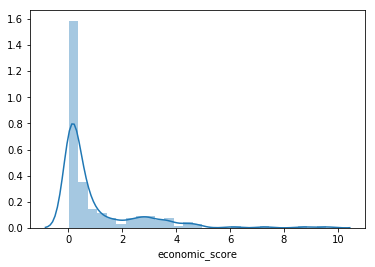

In [21]:
economic_df = economic_development_df[['Country','economic_score']]
economic_df = economic_df.dropna()
x = economic_df['economic_score']
sns.distplot(x);

### Distribution of Women's Empowerment Scores
Below, we can see that the data for empowerment scores is skewed much more subtely than that of the economic development scores above, and it is skewed to the left. This is to say that a moderate number of countries score slightly positively (i.e. above zero) while a 'tail' of "low-scoring" countries skew the data to the left.

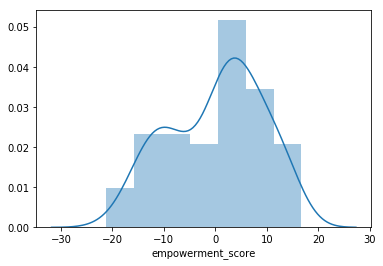

In [22]:
# let's take a look at the distribution of empowerment scores across the global population
empowerment_df = female_empowerment_df[['Country','empowerment_score']]
empowerment_df = empowerment_df.dropna()
x = empowerment_df['empowerment_score']
sns.distplot(x);

In [23]:
# let's combine the data sets to see what a correlation between them might look like
economic_empowerment_df = economic_df.merge(empowerment_df)
economic_empowerment_df['economic_score'].astype(float)
economic_empowerment_df.head()

,Country,economic_score,empowerment_score
0,Albania,0.178549,3.449849
1,Algeria,0.247532,2.003102
2,Argentina,0.948845,4.586180
3,Armenia,0.129786,5.176974
4,Australia,2.800336,12.613228


In [24]:
economic_empowerment_df.describe()

,economic_score,empowerment_score
count,142.000000,142.000000
mean,0.850082,0.192995
std,1.280349,9.166028
min,0.015014,-21.247676
25%,0.068134,-7.721749
50%,0.227284,1.622599
75%,0.809737,6.981490
max,6.076855,16.749922


## Plotting Female Empowerment Against Economic Performance

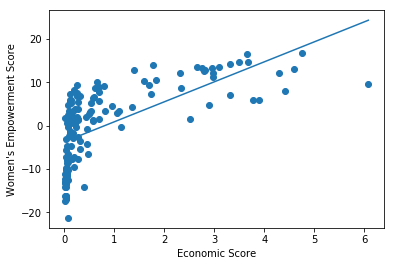

In [25]:
x = economic_empowerment_df['economic_score']
y = economic_empowerment_df['empowerment_score']
plt.scatter(economic_empowerment_df['economic_score'],economic_empowerment_df['empowerment_score'])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Women's Empowerment Score")
plt.xlabel('Economic Score');

In [31]:
correlation_coefficient = np.corrcoef(x,y)[0, 1]
print('The Correlation Coefficent is: ', correlation_coefficient)
linregress(x,y)

The Correlation Coefficent is:  0.6444098047221418


LinregressResult(slope=4.613333364505631, intercept=-3.7287166219708845, rvalue=0.6444098047221418, pvalue=5.03408556174503e-18, stderr=0.46266707904557614)

## Conclusions:
A close look at the data below reveals an interesting trend. It appears that there is a correlation between Economic Development and Women's Empowerment. However, the data is nueanced. There are a number of countries that have relatively high women's empowerment scores but relatively low economic development scores. On the other hand, there are no countries with high ecnomic development scores but low women's empowerment scores. 

The data shows a moderate positive correlated with a correlation coefficient of 0.644. This correlation may or may not be statistically significant with a p-value of 5.03 at a confidence level of 5.00%.
    
### What does this mean? 
On the surface this may seem to imply that attributes such as female empowerment presage economic development. This is supported by the visible 'arc' of counrties first 'rising up' the female empowerment rankings and then 'shfiting right' across the economic development rankings. That said, we also need to recognize a couple of attributes of the data: As countries begin to increase female empowerment and shift right across the economic development rankings, the variation in the data increases. This is indicative that more factors come into play as countries climb the economic ladder.

In conclusion, it seems that there is a moderate correlation between female empowerment and economic development and the correlation is on the very margins of statistical significance. There *seems* to be a particular 'path of development' as countries develop female empowerment and then economic development, but to confirm this would require historical data, which (in this data set) is not complete enough to be reliable. It is important to note that, while there may be a correlation, there cannot be any prrof (from this data) of causation (in either direction). 

### Limitations:
1. I did not 'control' for female empowerment. Economic growth is complicated and is affected by numerous factors. These might include wars, infrastructure, social and political developments, historical and cultural effects, technological changes, and imeasurable other factors. This does mean, therefore, that I cannot claim the female empowerment causes economic development (or vice versa), only that they are correlated.
2. The Female Empowerment indicators used may not be exclusively tied to females. I used the number of years girls spent in school, the number of murdered women, and the mean age of marriage for women as my indicators of women's empowerment. These, however, may have limitations. Violance against women may not be gender-motivated but a simple consequence of higher overall violence (e.g. in countries in conflict). More education for women may be indicative of higher education over. I simply did not have enough data from GapMinder to answer these questions.

Note: I did not use fillna on NaN values because there were quite a few, due to inconsistent data, and I did not want to create too large a proportion of 'synthetic data'.